# Quick start

In [30]:
%load_ext autoreload
%autoreload 2

from py3dinterpolations.core import GridData
from py3dinterpolations.modelling import interpolate
from py3dinterpolations.plotting.plotting import plot_3d_model

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import data from pandas

The package is written so to be able to import data from pandas. The data must be in a pandas dataframe.

Column names could be either default ["X", "Y", "Z","V"] or custom. In the latter case, the user must specify the column names in the function call.

In [31]:
df = pd.read_csv(
    "../../../tests/fixtures/griddata_default_colnames.csv"
)
df.tail()

,ID,X,Y,Z,V
278,ID00,15.194,0.0,12.0,9.047969
279,ID00,15.194,0.0,10.0,10.077271
280,ID00,15.194,0.0,8.0,20.082454
281,ID00,15.194,0.0,6.0,19.042223
282,ID00,15.194,0.0,4.0,12.889411


## GridData object

This object is designed to store the data that is being interpolated in an efficient manner. It is a wrapper around a pandas dataframe, with capability to return the equivalent numpy array for interaction with interpolation packages (eg. pyKrige, scipy)

In [32]:
gd = GridData(df)
gd.data

V
ID   X      Y      Z              
ID30 62.163 14.336 20.0   7.523950
                   18.0   7.504403
                   16.0  12.431670
                   14.0  12.653931
                   12.0  17.956143
...                            ...
ID00 15.194 0.000  12.0   9.047969
                   10.0  10.077271
                   8.0   20.082454
                   6.0   19.042223
                   4.0   12.889411

[283 rows x 1 columns]

## Interpolate


Interpolate by calling the `Interpolator3D` objects, that wraps up all ncessary functions to interpolate the data.

- Calulcates required 3d grid for prediction
- Executes preprocessing
- Fit the model
- Executes interpolation 

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 0.9354345646684079
Full Sill: 1.3881780372657402
Range: 1.3471914574752943
Nugget: 0.4527434725973323 



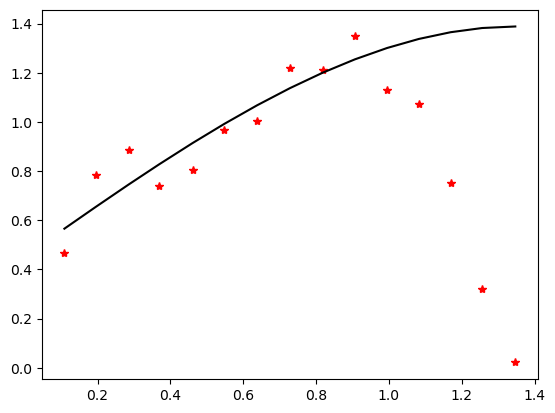

Calculating statistics on variogram model fit...
Q1 = 0.07837620908875799
Q2 = 1.008397763516137
cR = 0.6793915818318412 

Executing Ordinary Kriging...



In [33]:
interpolated, model = interpolate(
    gd,
    model_name = "ordinary_kriging",
    model_params = {
        "variogram_model": "spherical",
        "nlags": 15,
        "weight": True,
        "exact_values": False,
        "verbose": True,
        "enable_plotting": True,
    },
    grid_resolution=5,
    preprocess_kwags={
        "normalize_xyz": True,
        "standardize_v": True,
    },
    return_model=True, # get all components, not only the resulting interpolated grid
)

The `return_model` parameter allows to return the model of the interpolation.

<div class="alert alert-block alert-info">
Model can be returned because user might need to inspect it.
</div>

In [34]:
interpolated

array([[[29.42375941, 25.79533389,  9.25729328,  5.58607107],
        [30.93054254, 27.40146942,  9.39284799,  6.00957236],
        [32.37926928, 29.11380029,  9.52612729,  6.43620575],
        ...,
        [24.18011407, 23.93734962, 14.59653758,  6.85502299],
        [22.92854209, 22.63315455, 14.01738576,  6.6071688 ],
        [21.66352534, 21.32032068, 13.40197948,  6.32903193]],

       [[32.68867889, 33.10632199, 11.10326158,  6.59984191],
        [34.52366947, 36.19357133, 11.22267251,  7.01398292],
        [36.27701104, 39.58571306, 11.30130019,  7.41901971],
        ...,
        [25.27830616, 25.73292157, 15.26681983,  7.50269766],
        [23.85197945, 24.08958858, 14.62048407,  7.25691375],
        [22.42435011, 22.47778581, 13.94659211,  6.98255162]],

       [[34.62470389, 38.84804099, 12.97528986,  7.3365306 ],
        [36.72375275, 43.35376306, 13.09267457,  7.69563553],
        [38.73558505, 48.40186411, 13.10405324,  8.04626432],
        ...,
        [25.87941968, 27.17

In [35]:
model

## 3D Visualization with Plotly

The package natively supports `matplotlib` and `plotly` for visualization.

In [36]:
import plotly.io as pio
# This ensures Plotly output works in multiple places:
# plotly_mimetype: VS Code notebook UI
# notebook: "Jupyter: Export to HTML" command in VS Code
# See https://plotly.com/python/renderers/#multiple-renderers
pio.renderers.default = "plotly_mimetype+notebook"

In [39]:
fig = plot_3d_model(
    model,
    plot_points=True,
    scale_points=10,
    surface_count=10

)
fig.show()